# Read model during iteration

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_0.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read velocity at 2nd iteration
group   = "model"           
dataset = "vel_inv_0002"    
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()

# we can interp it to a 2D slice at depth
depth = 0.0
tmp = data_field.interp_dep(depth, field=dataset)
lon   = tmp[:,0]
lat   = tmp[:,1]
vel   = tmp[:,2]

# we read initial velocity model
dataset = "vel_inv_0000"    
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
vel_init = data_field.interp_dep(depth, field=dataset)[:,2]

# calculate velocity perturbation
vel_pert = (vel - vel_init)/vel_init * 100.0

# Similarly, we do the same process for xi and eta
dataset = "xi_inv_0002"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
xi = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "eta_inv_0002"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
eta = data_field.interp_dep(depth, field=dataset)[:,2]

# calculate epsilon (magnitude of anisotropy)
epsilon = np.sqrt(xi**2 + eta**2)


# prepare for plotting fast velocity directions
# magnitude and direction of anisotropy
dataset = "xi_inv_0002"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
tmp     = data_field.interp_dep(depth, field=dataset, samp_interval=20) # fast velocity direction, samp_interval is the sampling one point every 20 points in each axis
ani_lon = tmp[:,0]
ani_lat = tmp[:,1]
ani_xi  = tmp[:,2]

dataset = "eta_inv_0002"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
ani_eta    = data_field.interp_dep(depth, field=dataset, samp_interval=20)[:,2] # fast velocity direction, samp_interval is the sampling one point every 20 points in each axis

ani_epsilon = np.sqrt(ani_xi**2 + ani_eta**2)
ani_phi     = np.rad2deg(0.5*np.arctan2(ani_eta, ani_xi))

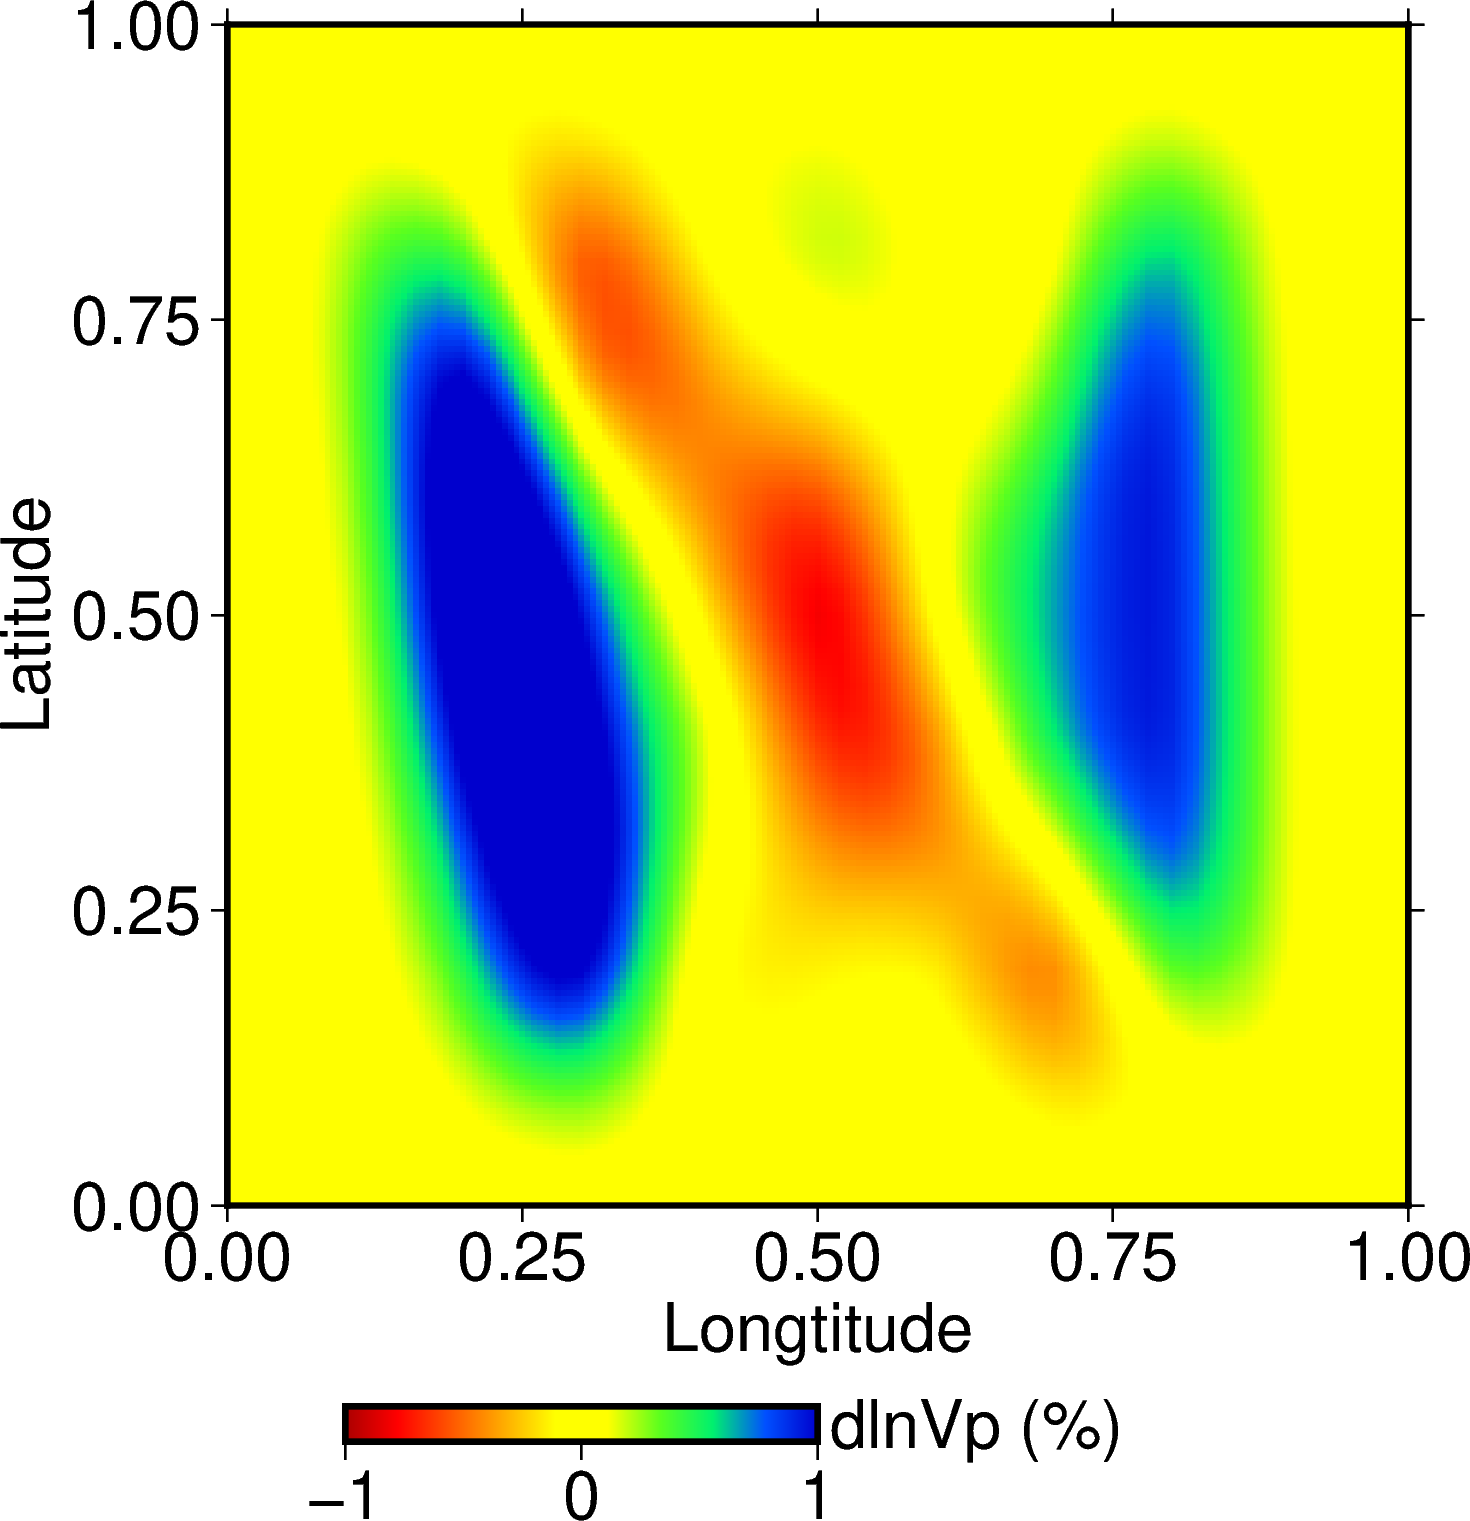

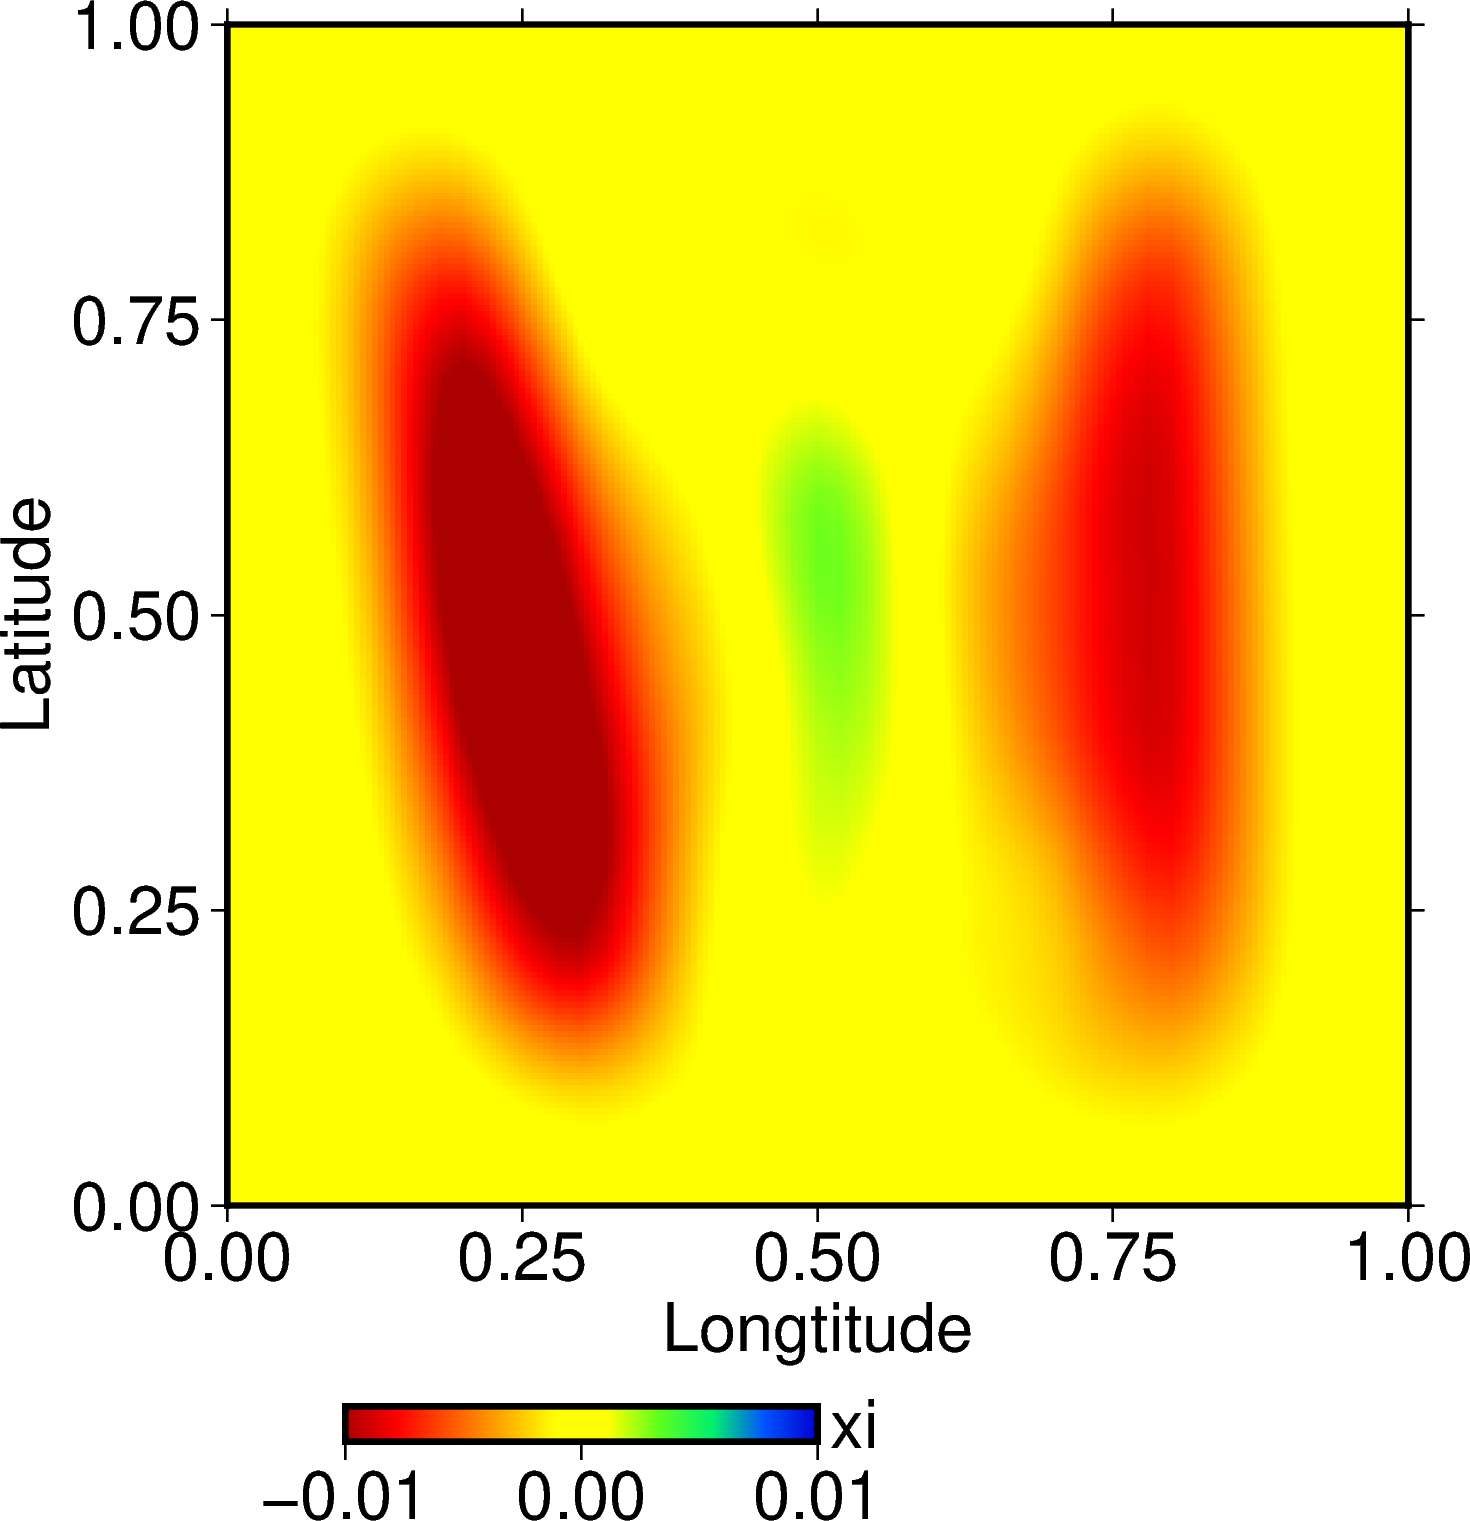

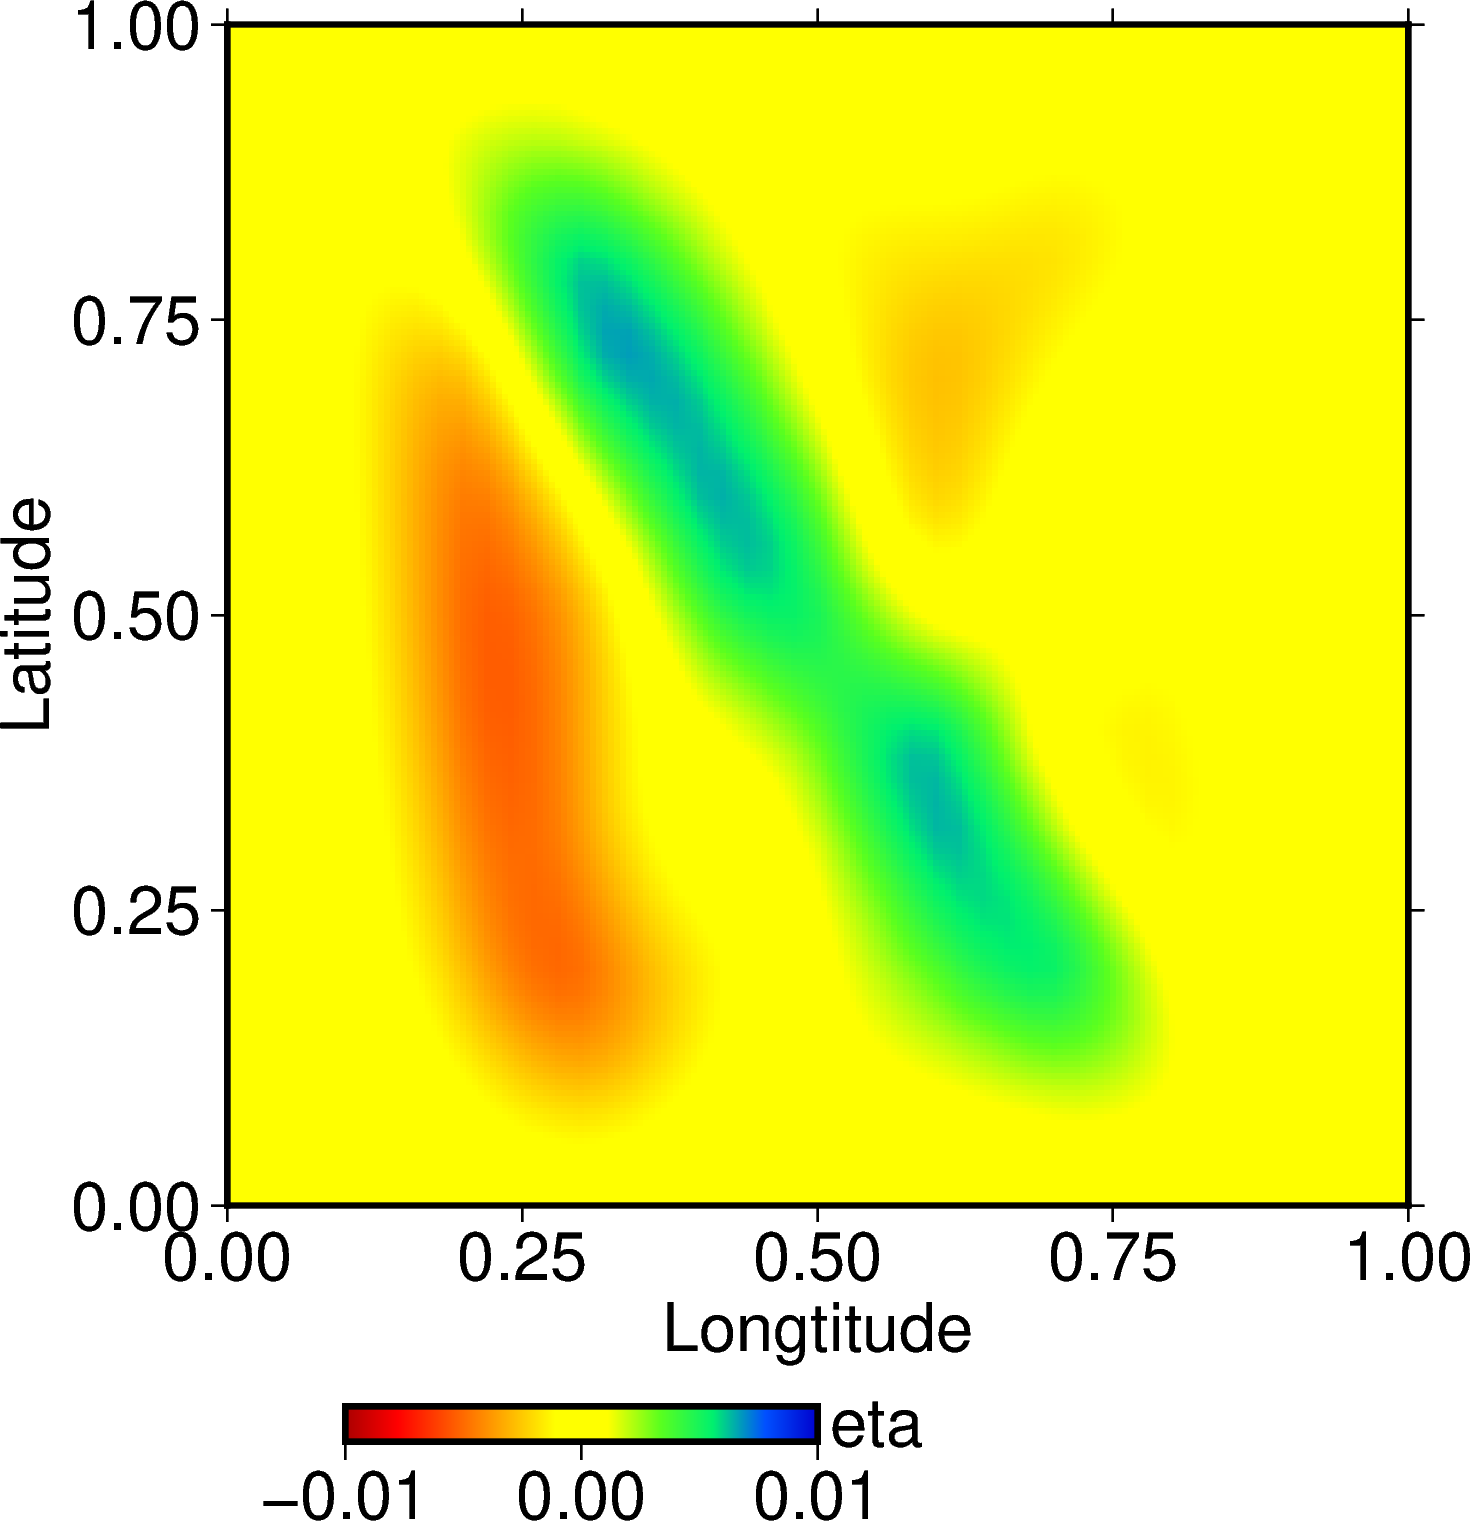

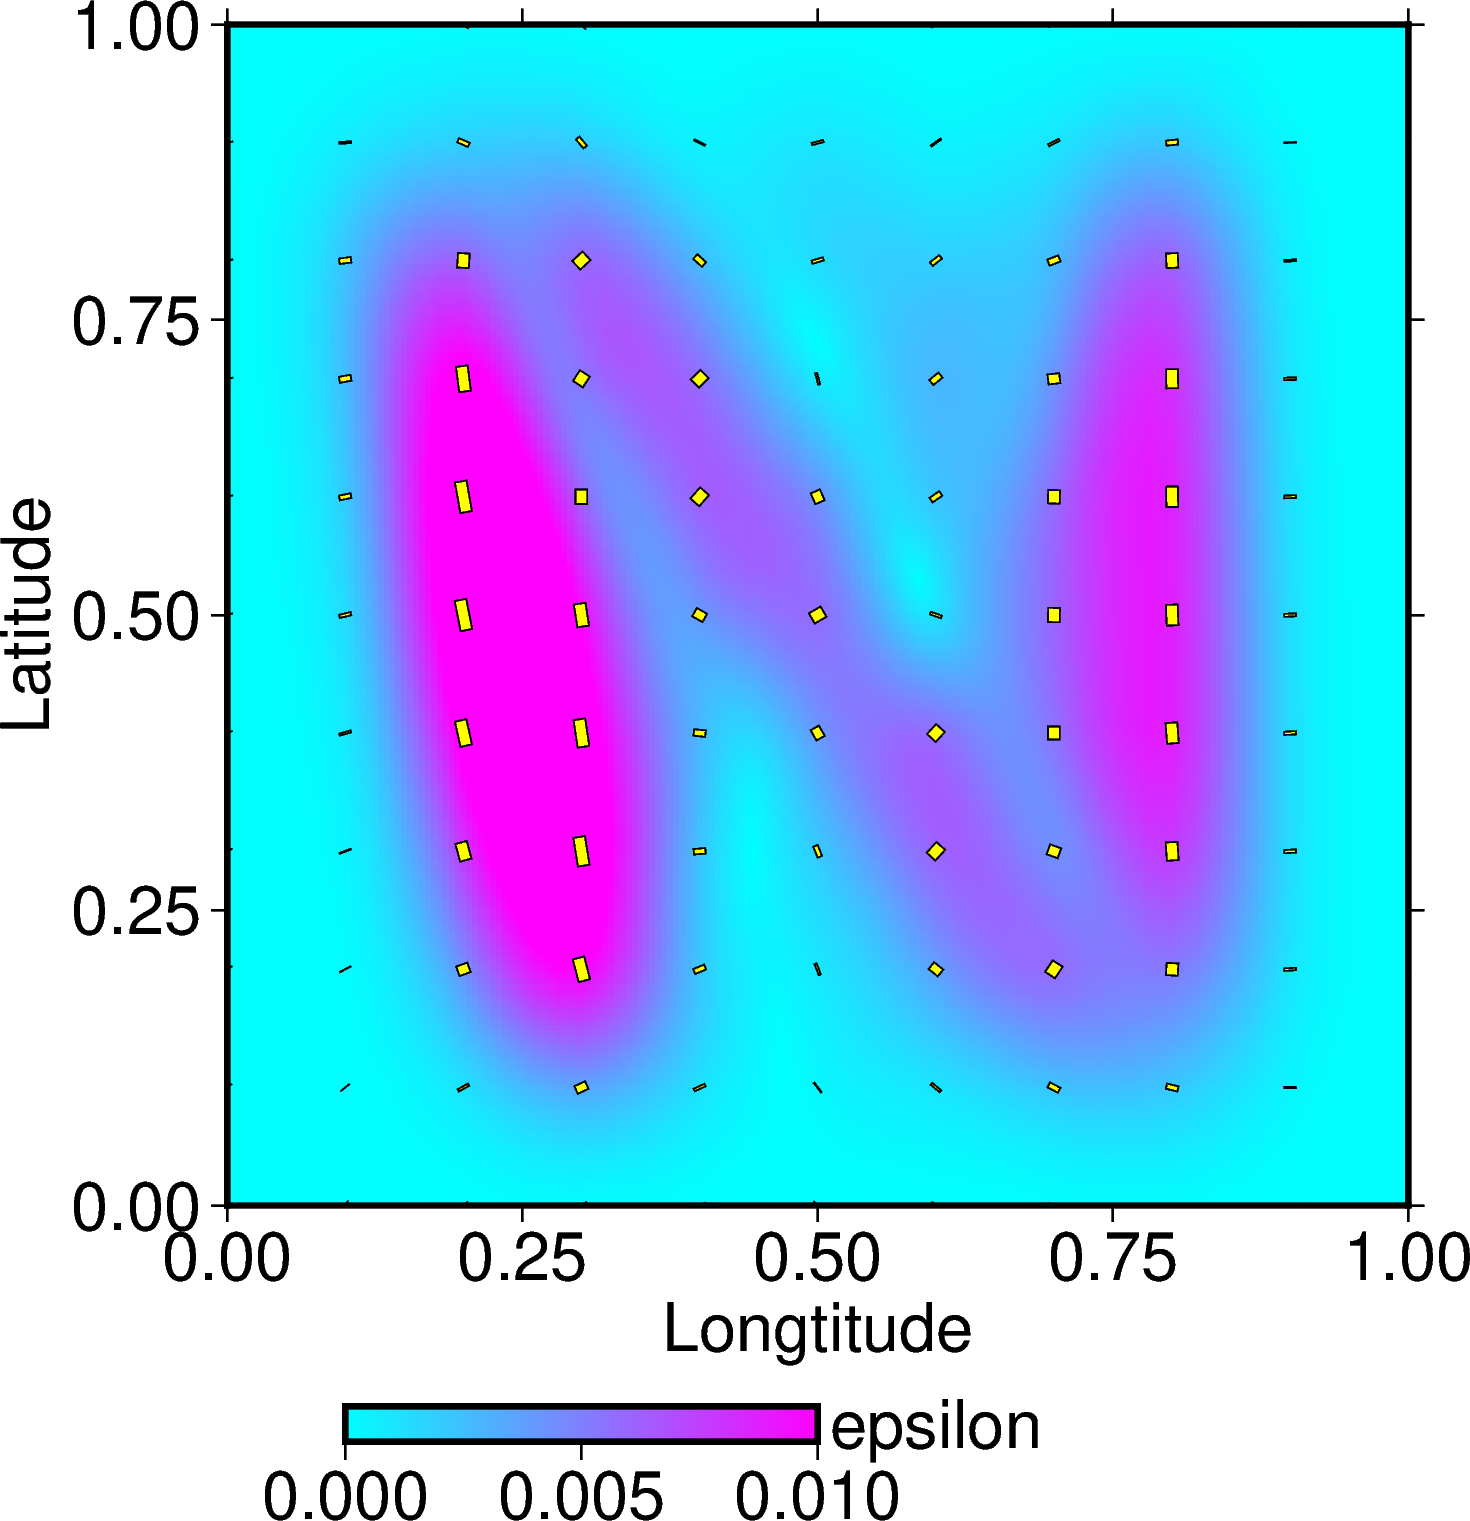

In [3]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

dx = 0.01; dy = 0.01

fname = 'img/6a_vel_pert.png'
fig = plot_map(lon,lat,vel_pert,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "dlnVp (%)",
            cpt_range = [-1,1],)

fname = 'img/6b_xi.png'
fig = plot_map(lon,lat,xi,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "xi",
            cpt_range = [-0.01,0.01],)

fname = 'img/6c_eta.png'
fig = plot_map(lon,lat,eta,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "eta",
            cpt_range = [-0.01,0.01],)

fname = 'img/6d_ani.png'
ani = np.hstack([ani_lon[:,None], ani_lat[:,None], ani_phi[:,None], ani_epsilon[:,None]*20, np.ones((ani_phi.shape[0],1))*0.1])
fig = plot_map(lon,lat,epsilon,dx,dy,
            anisotropy = ani,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "epsilon",
            cmap = "cool",
            cpt_range = [0,0.01],)